In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
# Read the dataset
dataset = pd.read_csv("merged_data\\merged_mmda_wwo_Bluementritt_2015.csv", skipinitialspace=True, encoding='cp1252')

# Remove unused columms
cols_to_remove = list(range(1,3))
cols_to_remove = cols_to_remove + [6, 7, 9, 17, 19, 21, 22, 25]

dataset.drop(dataset.columns[[cols_to_remove]], axis=1, inplace=True)
dataset.head()

,dt,statusN,statusS,tempC,windspeedKmph,cond,precipMM,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustKmph,feelsLikeC
0,2015-01-01 00:00:00,0.0,0.0,0.2000,0.295455,0.631579,0.0,0.84058,1.0,0.758621,0.330,0.206897,0.538462,0.2000,0.236111,0.206897
1,2015-01-01 00:15:00,0.0,0.0,0.1875,0.295455,0.631579,0.0,0.84058,1.0,0.758621,0.325,0.206897,0.538462,0.1875,0.239583,0.206897
2,2015-01-01 00:30:00,0.0,0.0,0.1750,0.295455,0.631579,0.0,0.84058,1.0,0.758621,0.320,0.206897,0.538462,0.1750,0.243056,0.206897
3,2015-01-01 00:45:00,0.0,0.0,0.1625,0.295455,0.631579,0.0,0.84058,1.0,0.758621,0.315,0.206897,0.538462,0.1625,0.246528,0.206897
4,2015-01-01 01:00:00,0.0,0.0,0.1500,0.295455,0.631579,0.0,0.84058,1.0,0.758621,0.310,0.206897,0.538462,0.1500,0.250000,0.206897


In [3]:
dataset.set_index('dt', inplace = True)
dataset.head()

,statusN,statusS,tempC,windspeedKmph,cond,precipMM,humidity,visibility,pressure,cloudcover,heatIndexC,dewPointC,windChillC,windGustKmph,feelsLikeC
dt,,,,,,,,,,,,,,,
2015-01-01 00:00:00,0.0,0.0,0.2000,0.295455,0.631579,0.0,0.84058,1.0,0.758621,0.330,0.206897,0.538462,0.2000,0.236111,0.206897
2015-01-01 00:15:00,0.0,0.0,0.1875,0.295455,0.631579,0.0,0.84058,1.0,0.758621,0.325,0.206897,0.538462,0.1875,0.239583,0.206897
2015-01-01 00:30:00,0.0,0.0,0.1750,0.295455,0.631579,0.0,0.84058,1.0,0.758621,0.320,0.206897,0.538462,0.1750,0.243056,0.206897
2015-01-01 00:45:00,0.0,0.0,0.1625,0.295455,0.631579,0.0,0.84058,1.0,0.758621,0.315,0.206897,0.538462,0.1625,0.246528,0.206897
2015-01-01 01:00:00,0.0,0.0,0.1500,0.295455,0.631579,0.0,0.84058,1.0,0.758621,0.310,0.206897,0.538462,0.1500,0.250000,0.206897


Text(0.5,0,'Date')

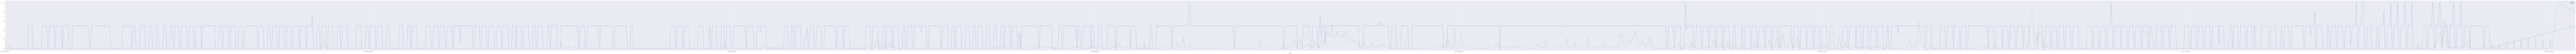

In [6]:
precipMM = dataset[['precipMM']]
statusS = dataset[['statusS']]

df_rm = pd.concat([statusS.rolling(12).mean(), precipMM.rolling(12).mean()], axis = 1)
df_rm.plot(figsize = (500, 10), linewidth = 1, fontsize = 10)
plt.xlabel('Date', fontsize = 10)

Text(0.5,0,'Date')

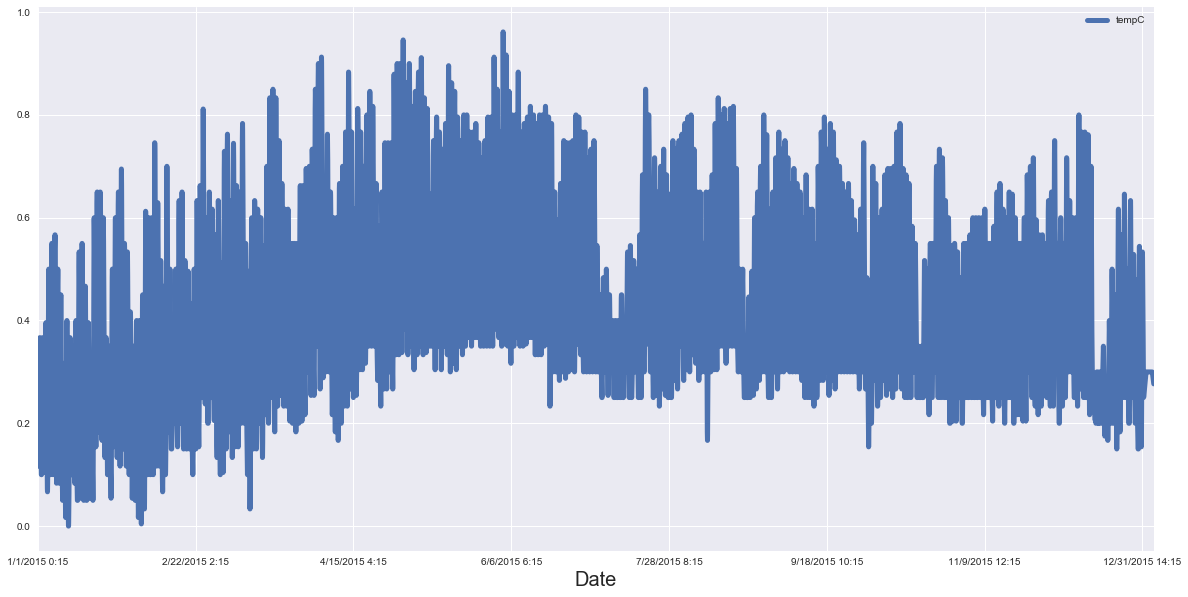

In [15]:
tempC = dataset[['tempC']]
tempC.rolling(12).mean().plot(figsize = (20, 10), linewidth = 5, fontsize = 10)
plt.xlabel('Date', fontsize=20)